 <h1 style="text-align:center;">Final Project 4</h1>
 
- Nama : **Muhammad Rinande Ansutia**
- Kode Peserta : **PYTN-KS19-021**

## Project Overview

Dataset yang digunakan adalah sebanyak 8950 data pengguna aktif kartu kredit pada enam bulan terakhir. Terdapat 18 variabel dalam dataset sebagai berikut:

1. **CUST_ID** - Nomor identifikasi pemegang kartu kredit. Ini merupakan atribut kategorikal yang unik untuk setiap pengguna.
2. **BALANCE** - Jumlah saldo yang tersisa di akun pengguna untuk melakukan pembelian. Ini menunjukkan seberapa banyak uang yang masih tersedia di akun.
3. **BALANCE_FREQUENCY** - Seberapa sering saldo diperbarui, dinyatakan dalam rentang skor antara 0 sampai 1. Skor 1 menunjukkan pembaruan yang sering, sedangkan skor 0 menunjukkan pembaruan yang jarang dilakukan.
4. **PURCHASES** - Jumlah pembelian yang dilakukan dari akun pengguna. Ini mencakup semua pembelian yang dilakukan.
5. **ONEOFF_PURCHASES** - Jumlah maksimum pembelian yang dilakukan dalam satu transaksi.
6. **INSTALLMENTS_PURCHASES** - Jumlah pembelian yang dilakukan dengan sistem pembayaran secara cicilan.
7. **CASH_ADVANCE** - Jumlah uang tunai yang diberikan oleh pengguna.
8. **PURCHASES_FREQUENCY** - Seberapa sering pembelian dilakukan, dengan skor antara 0 sampai 1. Skor 1 menunjukkan pembelian yang sering dilakukan, sedangkan skor 0 menunjukkan pembelian yang jarang dilakukan.
9. **ONEOFF_PURCHASES_FREQUENCY** - Seberapa sering pembelian dilakukan dalam satu transaksi tunggal.
10. **PURCHASES_INSTALLMENTS_FREQUENCY** - Seberapa sering pembelian dilakukan dengan sistem pembayaran cicilan, dengan skor 0 sampai 1. Skor 1 menunjukkan pembelian dengan cicilan yang sering dilakukan, sedangkan skor 0 menunjukkan pembelian dengan cicilan yang jarang dilakukan.
11. **CASH_ADVANCE_FREQUENCY** - Seberapa sering uang tunai diminta atau diambil oleh pengguna.
12. **CASH_ADVANCE_TRX** - Jumlah transaksi yang dilakukan menggunakan uang tunai.
13. **PURCHASES_TRX** - Jumlah transaksi pembelian yang dilakukan.
14. **CREDIT_LIMIT** - Batas kredit dari kartu kredit untuk pengguna.
15. **PAYMENTS** - Jumlah pembayaran yang dilakukan oleh pengguna.
16. **MINIMUM_PAYMENTS** - Jumlah minimum pembayaran yang harus dibayarkan oleh pengguna.
17. **PRC_FULL_PAYMENT** - Persentase pembayaran penuh yang dibayarkan oleh pengguna dari total tagihan. 0 sampai 1
18. **TENURE** - Waktu pelayanan kartu kredit untuk pengguna, atau lamanya pengguna telah memiliki kartu kredit ini.

## Import Library

In [91]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

from statsmodels.stats.diagnostic import normal_ad
from scipy.stats import skew

import warnings
warnings.filterwarnings("ignore")

from kneed import KneeLocator
import pickle

## Data Loading

In [92]:
df = pd.read_csv('CC GENERAL.csv')
pd.set_option('display.max_columns', None)
df.reset_index(drop=True)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [93]:
df.shape

(8950, 18)

Dataset ini memiliki 8950 baris dengan 18 kolom.

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

## Data Cleaning

In [95]:
# Check duplicated data
df.duplicated().sum()

0

Tidak ada data duplikat dari dataset di atas

In [96]:
# Check null values
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Terdapat missing values di Kolom 'CREDIT_LIMIT' dan 'MINIMUM_PAYMENTS'.<br>
Missing values tersebut akan diisi dengan median.<br>

In [97]:
median_credit_limit = df['CREDIT_LIMIT'].median()
df['CREDIT_LIMIT'].fillna(median_credit_limit, inplace=True)

median_minimum_payments = df['MINIMUM_PAYMENTS'].median()
df['MINIMUM_PAYMENTS'].fillna(median_minimum_payments, inplace=True)

In [98]:
# Check null values
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

Terlihat sudah tidak ada missing values karna sudah diisi dengan median.

In [99]:
# drop kolom 'CUST_ID' karna tidak diperlukan
df = df.drop('CUST_ID', axis=1)
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,312.343947,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


## EDA

#### Persebaran Data

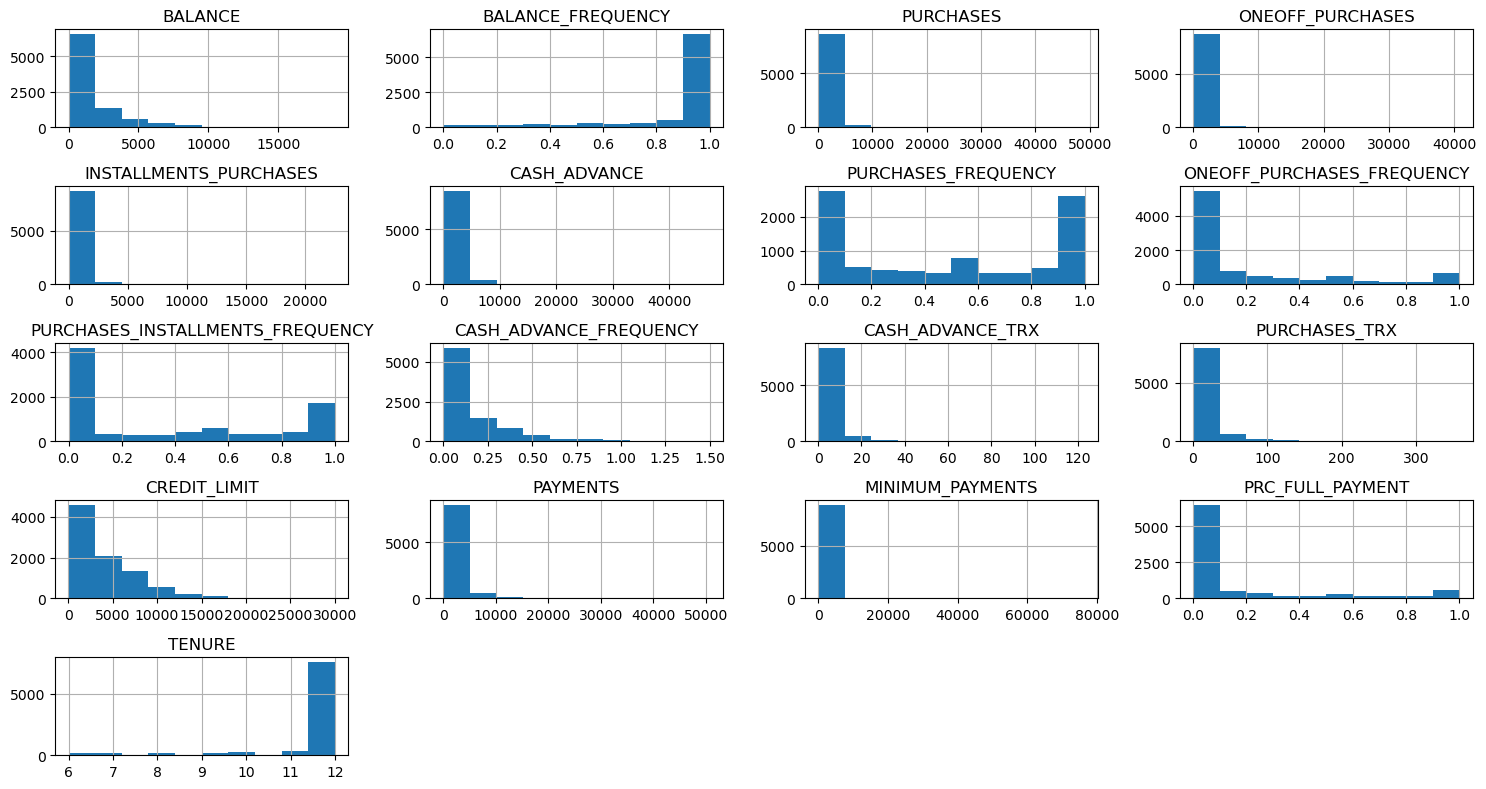

In [100]:
df.hist(figsize=(15, 8))
plt.title('Pesebaran Data')
plt.tight_layout()
plt.show()

#### Data Corelation

In [101]:
df.corr()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.322412,0.181261,0.164350,0.126469,0.496692,-0.077944,0.073166,-0.063186,0.449218,0.385152,0.154338,0.531296,0.322802,0.397920,-0.318959,0.072692
BALANCE_FREQUENCY,0.322412,1.000000,0.133674,0.104323,0.124292,0.099388,0.229715,0.202415,0.176079,0.191873,0.141555,0.189626,0.095931,0.065008,0.131181,-0.095082,0.119776
PURCHASES,0.181261,0.133674,1.000000,0.916845,0.679896,-0.051474,0.393017,0.498430,0.315567,-0.120143,-0.067175,0.689561,0.356977,0.603264,0.095789,0.180379,0.086288
ONEOFF_PURCHASES,0.164350,0.104323,0.916845,1.000000,0.330622,-0.031326,0.264937,0.524891,0.127729,-0.082628,-0.046212,0.545523,0.319735,0.567292,0.050256,0.132763,0.064150
INSTALLMENTS_PURCHASES,0.126469,0.124292,0.679896,0.330622,1.000000,-0.064244,0.442418,0.214042,0.511351,-0.132318,-0.073999,0.628108,0.256515,0.384084,0.134019,0.182569,0.086143
CASH_ADVANCE,0.496692,0.099388,-0.051474,-0.031326,-0.064244,1.000000,-0.215507,-0.086754,-0.177070,0.628522,0.656498,-0.075850,0.303997,0.453238,0.140747,-0.152935,-0.068312
PURCHASES_FREQUENCY,-0.077944,0.229715,0.393017,0.264937,0.442418,-0.215507,1.000000,0.501343,0.862934,-0.308478,-0.203478,0.568430,0.119833,0.103464,0.006154,0.305802,0.061506
ONEOFF_PURCHASES_FREQUENCY,0.073166,0.202415,0.498430,0.524891,0.214042,-0.086754,0.501343,1.000000,0.142329,-0.111716,-0.069088,0.544869,0.295059,0.243537,-0.027311,0.157531,0.082466
PURCHASES_INSTALLMENTS_FREQUENCY,-0.063186,0.176079,0.315567,0.127729,0.511351,-0.177070,0.862934,0.142329,1.000000,-0.262958,-0.169207,0.529975,0.060794,0.085551,0.032055,0.250087,0.073275
CASH_ADVANCE_FREQUENCY,0.449218,0.191873,-0.120143,-0.082628,-0.132318,0.628522,-0.308478,-0.111716,-0.262958,1.000000,0.799561,-0.131168,0.132608,0.183192,0.100616,-0.249773,-0.133372


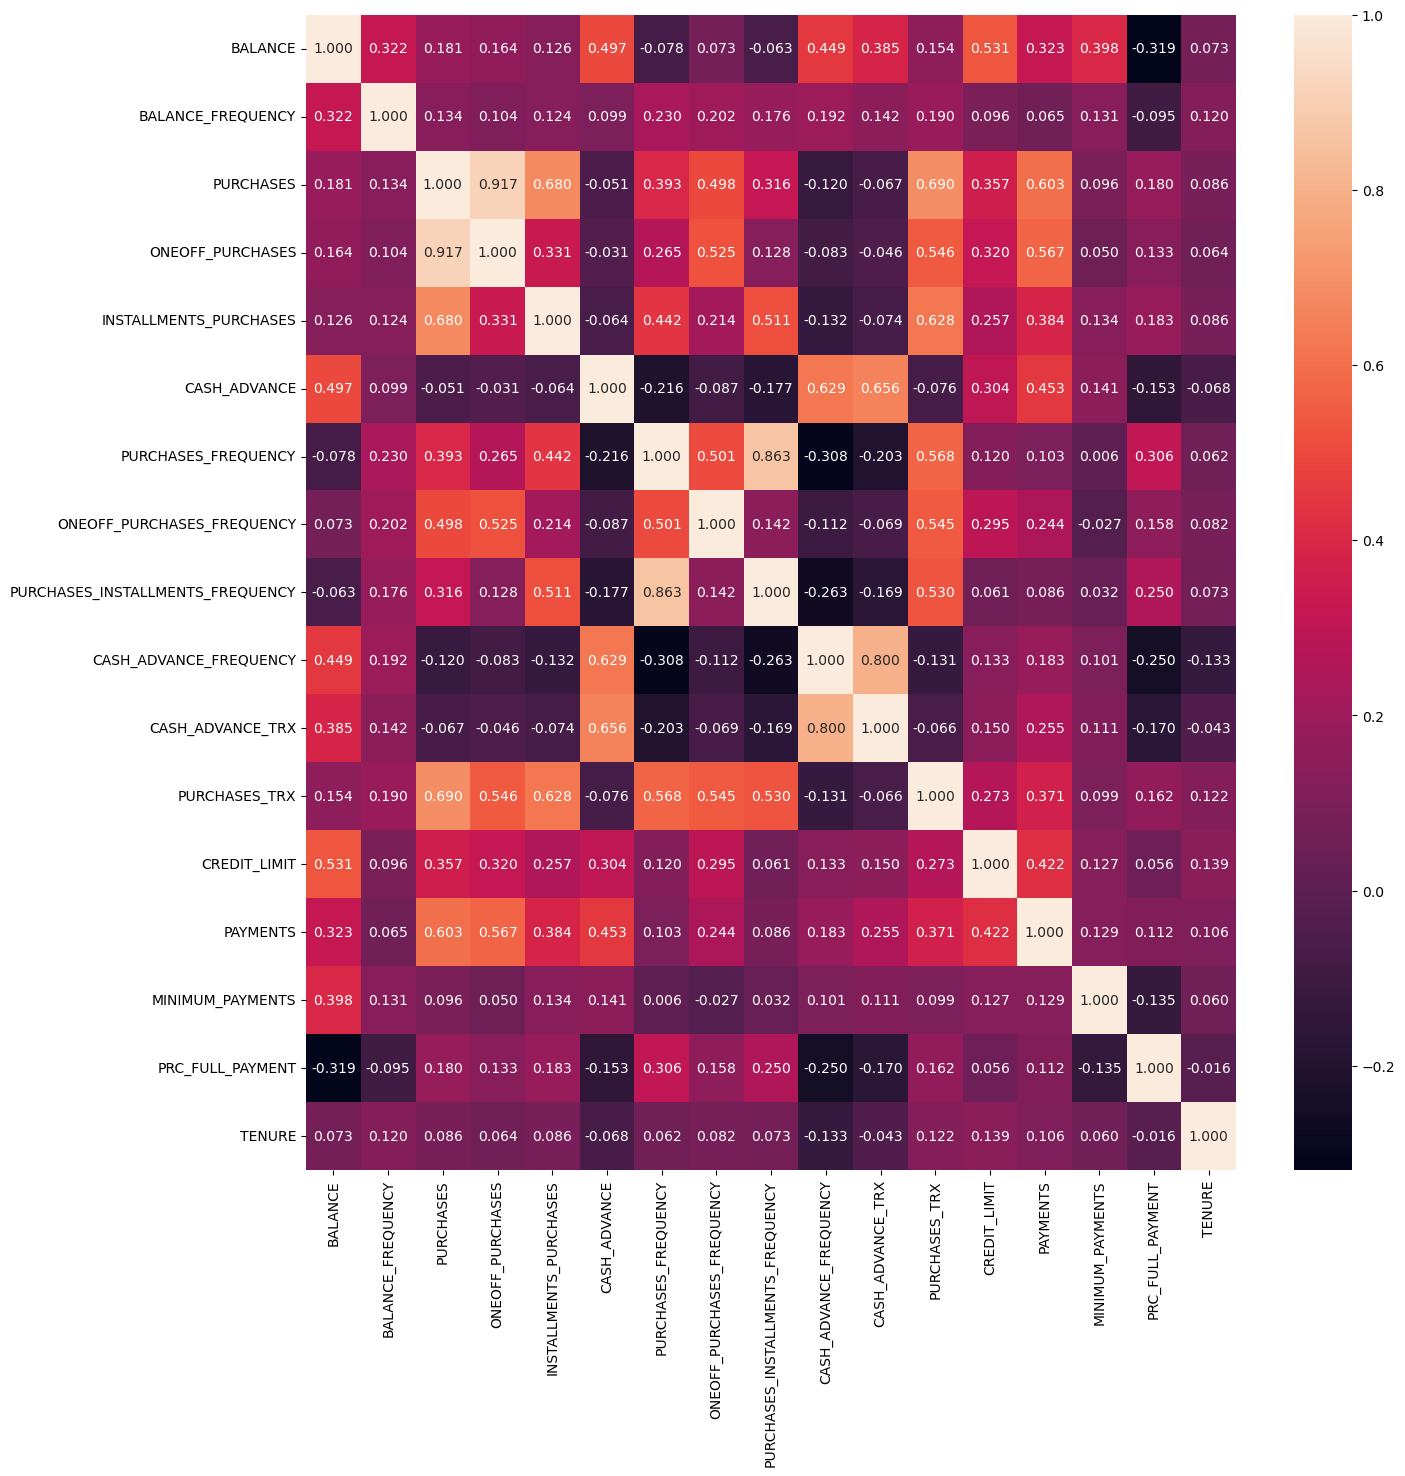

In [102]:
fig = plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True, fmt=".3f")
plt.show()

Text(0.5, 1.0, 'Korelasi Data Credit Limit Dengan Balance')

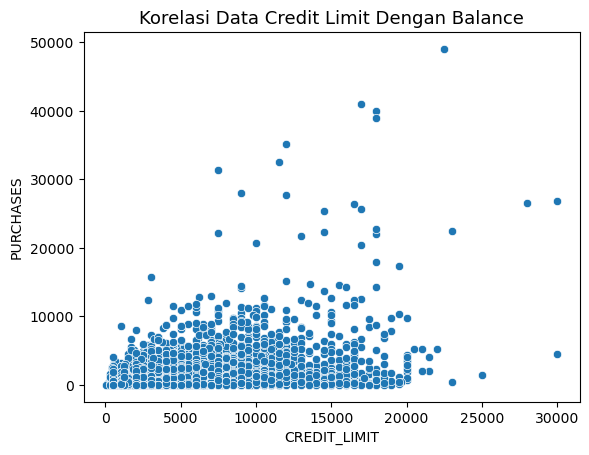

In [103]:
sns.scatterplot(x="CREDIT_LIMIT", y="PURCHASES", data=df)
plt.title("Korelasi Data Credit Limit Dengan Balance", fontsize= 13)

Dari scatter plot tersebut dapat dilihat bahwa dihasilkan korelasi positif antara credit limit dan balance.


## Data Preprocessing

In [104]:
# Melihat detail statistik data
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.282473,1733.143852,844.906767,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.646702,2895.063757,2332.792322,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,788.713501,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


#### Standar Scaler

In [105]:
# Standardize data
scaler = StandardScaler() 
df_train = scaler.fit_transform(df.values)
df_train.shape

(8950, 17)

## Model Defining
### K-Means

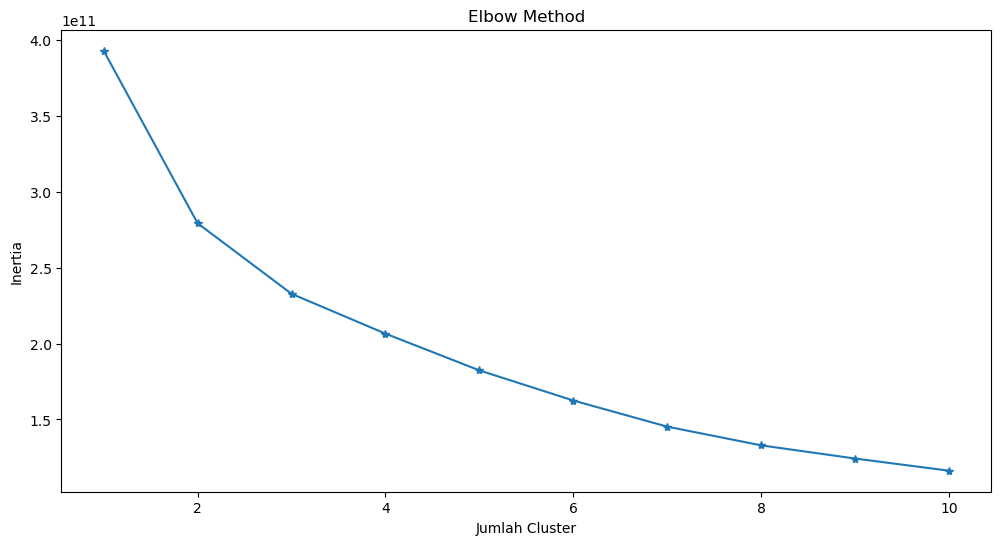

In [106]:
inertias = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init = 'k-means++', random_state=42)
    kmeans.fit(df)

    iner = kmeans.inertia_
    inertias.append(iner)
    
plt.figure(figsize=(12,6));
plt.plot(range(1,11), inertias, marker='*');
plt.xlabel("Jumlah Cluster");
plt.ylabel("Inertia");
plt.title("Elbow Method")
plt.show()

In [107]:
kl = KneeLocator(range(1, 11), inertias, curve = 'convex', direction = 'decreasing')
kl.elbow

3

Dari grafik di atas, didapatkan bahwa elbow terdapat pada cluster 3. Maka modelling akan digunakan menggunakan 3 cluster.

In [108]:
kmean = KMeans(n_clusters=3, init = 'k-means++', random_state=42)
predicted_train = kmean.fit_predict(df_train)
print(predicted_train)

[1 2 1 ... 1 1 1]


In [109]:
kmean.inertia_

111975.04359325652

In [110]:
score = silhouette_score(df_train, kmean.labels_, metric='euclidean')
score

0.25098792290537314

In [111]:
labels = kmean.labels_
labels

array([1, 2, 1, ..., 1, 1, 1])

In [112]:
df['cluster'] = labels
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


## Model Training
### PCA

In [113]:
pca = PCA(2)
principalComponents = pca.fit_transform(train_scaled)
x, y = principalComponents[:, 0], principalComponents[:, 1]
print(principalComponents.shape)

colors = {0: 'red', 1: 'blue', 2: 'green',3:'yellow'}

(6712, 2)


In [114]:
print(pca.explained_variance_ratio_)
print("Total informasi dari 2 Component= ", sum(pca.explained_variance_ratio_))

[0.27468955 0.20462787]
Total informasi dari 2 Component=  0.47931741828909546


Dari hasil menggunakan PCA di atas, dapat dilihat bahwa principal component 1 menampung 27.47% informasi dan principal component 2 menampung 20.46% informasi.

In [115]:
labels = labels[:6712]

In [116]:
colors = {0: 'red', 1: 'blue', 2: 'green'}
df_fix = pd.DataFrame({'x': x, 'y': y, 'label': labels}) 
groups = df_fix.groupby('label')

In [117]:
df_fix

,x,y,label
0,0.757753,3.722531,1
1,-1.913752,0.488286,2
2,-1.680336,0.108142,1
3,-0.342163,-1.354303,1
4,2.376224,-1.595881,1
...,...,...,...
6707,0.064934,-1.544665,2
6708,-1.959765,0.867171,1
6709,-1.541868,-1.117788,0
6710,-0.745660,-1.946885,1


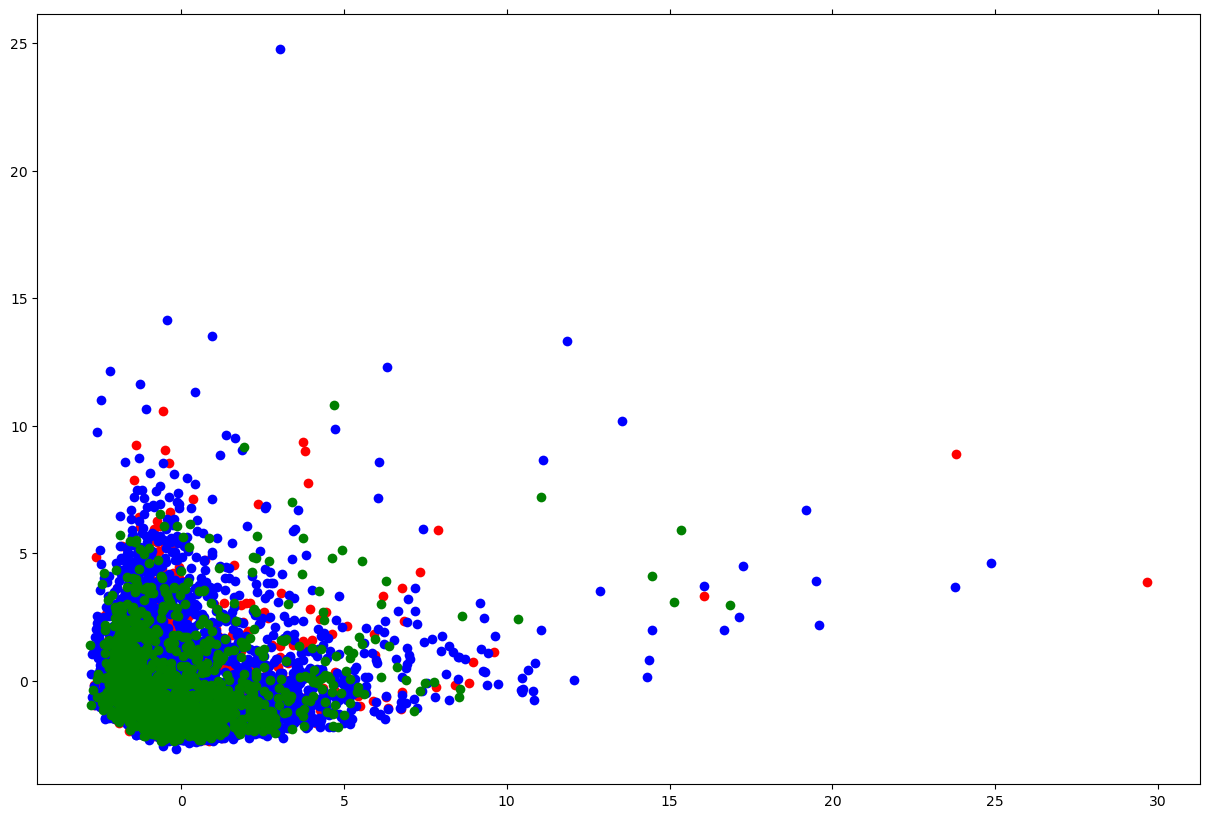

In [118]:
fig, ax = plt.subplots(figsize=(15,10))

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=7, color=colors[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')

plt.show()

### Cluster Analysis

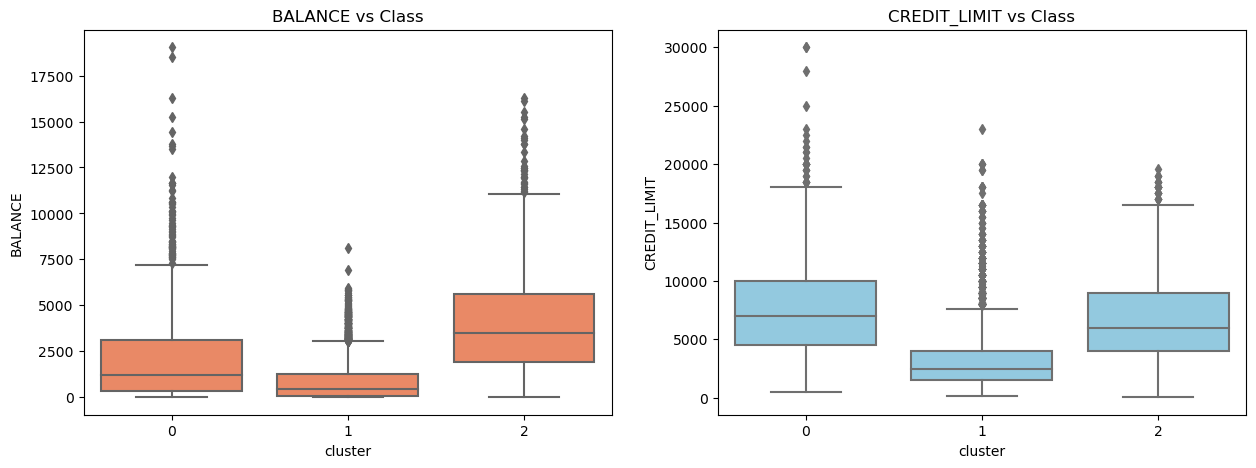

In [119]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

plt.subplot(1,2,1)
sns.boxplot(x = "cluster", y = "BALANCE", data  = df, color = "coral");
plt.title("BALANCE vs Class")

plt.subplot(1,2,2)
sns.boxplot(x = "cluster", y = "CREDIT_LIMIT", data  = df, color = "skyblue");
plt.title("CREDIT_LIMIT vs Class")

plt.show()

Perbandingan antara balance vs class dan credit_limit vs class, menghasilkan informasi bahwa semakin tinggi balance suatu class, maka credit_limit juga akan semakin tinggi juga. Sehingga dihasilkan kesimpulan sebagai berikut:

- Class 0: limit kredit pengguna rendah & pengguna sangat jarang memperbaharui isi saldo
- Class 1: limit kredit pengguna paling rendah & pengguna sangat jarang memperbaharui isi saldo
- Class 2: limit kredit pengguna paling tinggi & Pengguna sangat sering memperbaharui isi saldo

In [120]:
inference = pd.DataFrame({'BALANCE': [30, 0, 10000], 
                        'BALANCE_FREQUENCY':[0.7, 0.8 ,1], 
                        'PURCHASES': [2854, 460, 14628], 
                        'ONEOFF_PURCHASES':[715, 531,7100],
                        'INSTALLMENTS_PURCHASES':[2400, 0 ,2500], 
                        'CASH_ADVANCE':[4500, 0, 3000], 
                        'PURCHASES_FREQUENCY': [0.4, 0.1, 0.9],
                        'ONEOFF_PURCHASES_FREQUENCY' : [0, 0.3, 0], 
                        'PURCHASES_INSTALLMENTS_FREQUENCY': [0.5,0, 0.7],
                        'CASH_ADVANCE_FREQUENCY': [0.6,0,0.3], 
                        'CASH_ADVANCE_TRX':[4,0,6], 
                        'PURCHASES_TRX': [46, 10, 23],
                        'CREDIT_LIMIT': [50000, 5000, 15000], 
                        'PAYMENTS': [13668, 1400, 7000], 
                        'MINIMUM_PAYMENTS': [4000, 255, 8000], 
                        'PRC_FULL_PAYMENT': [0,1,0],
                        'TENURE':[12,12,12]})
inference

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,30,0.7,2854,715,2400,4500,0.4,0.0,0.5,0.6,4,46,50000,13668,4000,0,12
1,0,0.8,460,531,0,0,0.1,0.3,0.0,0.0,0,10,5000,1400,255,1,12
2,10000,1.0,14628,7100,2500,3000,0.9,0.0,0.7,0.3,6,23,15000,7000,8000,0,12


## Conclusion

Analisis data pengguna kartu kredit dilakukan dengan pendekatan klastering menggunakan algoritma K-Means dan teknik reduksi dimensi PCA. Berikut adalah kesimpulannya:

1. Klaster Pengguna:
    - Pengguna kartu kredit dapat dibagi menjadi 3 klaster utama berdasarkan pola pembelian dan aktivitas keuangan mereka.

2. Pola Pembelian dan Aktivitas Keuangan:
    - Klasterisasi memberikan pemahaman tentang perbedaan perilaku pengguna, seperti tingkat pembelian, frekuensi pembayaran, dan aktivitas penarikan tunai.

3. Rekomendasi Strategi:

    - Informasi ini dapat digunakan untuk merancang strategi pemasaran yang lebih terfokus atau peningkatan layanan yang sesuai untuk setiap klaster.

4. Visualisasi PCA:
    - Reduksi dimensi menggunakan PCA memungkinkan visualisasi data dalam ruang dua dimensi, memperlihatkan pemisahan yang lebih baik antar-klaster.

In [121]:
filename = "cc_clustering.sav"
pickle.dump(kmean, open(filename, "wb"))